In [61]:
import ipynbname

title = ipynbname.name().replace('_', ' ')
from benchmark import benchmark, method_constructor, latex_table, violin_plot

In [62]:
bm = benchmark(
    'Bak projects',
    'Bak2000_reactions',
    method_constructor(['HF',
                        'MP2', 'MP3', 'MP4', 'CCSD', 'PAPT2', 'PAPT3', 'PAPT4', 'CCSD(T)'
                        ], ),
    ['cc-pCVDZ', 'cc-pCVTZ', 'cc-pCVQZ', 'cc-pCV5Z'],
    # verbose=True,
    # reference='CCSD(T)',
    # check=True,
    initial='core,small',
    # backend='hawk-htc',
    # backend='marat', parallel=13,
)

In [3]:
for k in ['reaction energy deviations', 'reaction energies', 'reaction statistics']:
    lt = latex_table(bm[k], title + ': ' + k, reference_method='empirical')
    # print(lt)
    with open((title + ' ' + k + '.tex').replace(' ', '_'), 'w') as f:
        f.write(lt)
    print(bm[k])


       HF    MP2    MP3    MP4   CCSD  PAPT2  PAPT3  PAPT4  CCSD(T)
1   24.60  -3.25 -10.21   3.27  -1.47  -1.63  -0.85  -1.81    -1.18
2   18.46  -0.95 -32.98   8.66  -8.69 -12.35 -10.87  -3.06    -1.42
3  -10.09   7.85 -11.18   3.45  -5.54  -7.68  -7.62  -3.14    -1.45
4    4.16   6.25 -41.44  18.61 -16.53 -22.76 -20.04  -3.14    -0.19
5    5.80  -5.18 -18.76   4.31  -5.61  -9.02  -7.45  -0.61     0.82
6   30.40  -8.43 -28.97   7.58  -7.08 -10.65  -8.30  -2.42    -0.36
7   -8.71   3.55 -30.73   5.99 -11.79 -16.25 -14.64  -4.33    -1.39
8  -24.77 -20.61 -14.86  -1.56  -9.55  -8.87  -7.91  -0.67    -1.30
9  -14.36 -22.04 -30.41   2.29 -13.13 -15.68 -13.85  -2.05    -1.77
10 -19.92   4.98 -22.87   2.51 -11.72 -14.47 -12.85  -4.34    -0.55
11  51.91 -27.35  -8.78  -9.82   4.71   3.50   6.96  -1.24     0.80
12 -50.90 -38.18 -23.85  -4.69 -17.75 -15.64 -13.87  -1.50    -3.49
13 113.66 -51.83  -5.86 -18.71  15.59  13.79  19.15  -1.27     0.70
        HF     MP2     MP3     MP4    CCSD   PAP

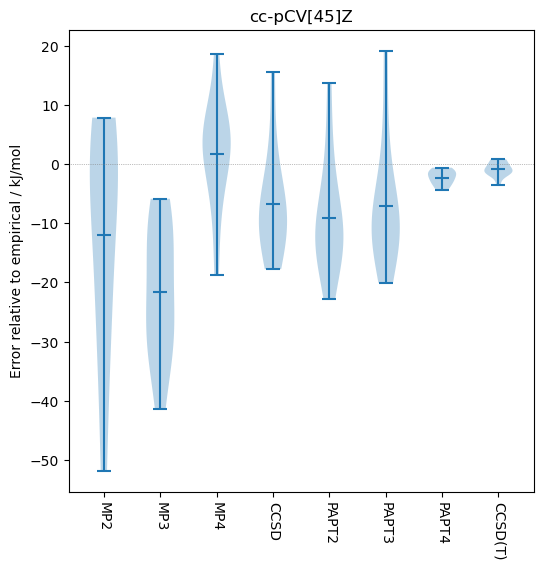

In [4]:
fig = violin_plot(bm, reference_method='empirical')
fig.savefig((title + ' reaction energy deviations.pdf').replace(' ', '_'), transparent=True, bbox_inches='tight',
            pad_inches=0)
fig


In [57]:
import shutil
for d in unused_project_directories(bm):
    shutil.rmtree(d)